In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import gmaps
from api_keys import g_key
from ipywidgets.embed import embed_minimal_html

In [2]:
montreal_collisions = pd.read_csv('Resources/montreal_2012_2018.csv')
montreal_incomes = pd.read_csv('Resources/montreal_incomes.csv')
montreal_districts = pd.read_csv('Resources/montreal_districts.csv')

In [3]:
montreal_collisions=montreal_collisions.rename(columns={'LOC_LONG':'Longitude',
                                                        'LOC_LAT':'Latitude',
                                                        'AN': 'Year',
                                                        'DT_ACCDN': 'Date',
                                                        'HR_ACCDN':'Hour',
                                                        'JR_SEMN_ACCDN':'Weekday',
                                                        'CD_COND_METEO':'Weather Conditions',
                                                        'CD_MUNCP':'District'
                                                       })

In [4]:
montreal_collisions= montreal_collisions.loc[montreal_collisions["GRAVITE"]== "Mortel"]
montreal_collisions= montreal_collisions.loc[montreal_collisions["REG_ADM"]== "Montréal(06)"]

In [5]:
montreal_collisions=pd.merge(montreal_collisions, montreal_districts, on= "District")

In [6]:
montreal_collisions['Hour'] = montreal_collisions['Hour'].str[:2]
montreal_collisions['Hour']=montreal_collisions['Hour'].replace('No',99)
montreal_collisions['Hour']=montreal_collisions['Hour'].astype(int)

In [7]:
montreal_data=montreal_collisions[['Longitude', 'Latitude', 'Year','Date','Hour','Districts']]
montreal_data=montreal_data.sort_values('Year',ascending=False)
montreal_data=montreal_data.reset_index(drop=True)
montreal_data.to_csv('Output/montreal_data.csv')

In [8]:
montreal_data

,Longitude,Latitude,Year,Date,Hour,Districts
0,-73.677218,45.518355,2018,2018/09/10,21,Montréal
1,-73.550944,45.547617,2018,2018/07/08,22,Montréal
2,-73.600069,45.544772,2018,2018/06/19,6,Montréal
3,-73.645704,45.529995,2018,2018/05/11,2,Montréal
4,-73.629950,45.541305,2018,2018/11/04,10,Montréal
...,...,...,...,...,...,...
174,-73.613588,45.539950,2012,2012/05/29,14,Montréal
175,-73.605014,45.539364,2012,2012/01/16,18,Montréal
176,-73.616715,45.551361,2012,2012/11/27,12,Montréal
177,-73.829372,45.467596,2012,2012/02/02,16,Pointe-Claire


In [9]:
final_montreal_data=pd.merge(montreal_data,montreal_incomes, how='outer',on='Districts')
final_montreal_data= final_montreal_data.rename(columns={'Median total income of households 2015':'Median Income'})
final_montreal_data=final_montreal_data.dropna()

In [10]:
montreal_hoods=pd.DataFrame(final_montreal_data.groupby('Districts').count()).reset_index()
hoods=montreal_hoods[["Districts","Hour"]]
hoods= hoods.rename(columns={"Hour": "Number of Collisions"})
final_montreal=pd.merge(hoods, montreal_incomes, how='outer',on='Districts')
final_montreal["City"]= "Montreal"
final_montreal=final_montreal.rename(columns={'Districts': "Neighbourhoods", 'Median total income of households 2015':'Median Income'})

In [17]:
final_montreal= final_montreal.dropna()
final_montreal=final_montreal.sort_values("Median Income").reset_index(drop=True)

In [18]:
final_montreal

,Neighbourhoods,Number of Collisions,Median Income,Population,City
0,Montréal,155.0,50227.0,1704694.0,Montreal
1,Montréal-Est,2.0,50318.0,3850.0,Montreal
2,Côte-Saint-Luc,2.0,58935.0,32448.0,Montreal
3,Dorval,3.0,64689.0,18980.0,Montreal
4,Sainte-Anne-de-Bellevue,2.0,67200.0,4958.0,Montreal
5,Dollard-Des Ormeaux,2.0,78981.0,48899.0,Montreal
6,Pointe-Claire,4.0,80242.0,31380.0,Montreal
7,Westmount,2.0,100153.0,20312.0,Montreal
8,Mont-Royal,1.0,109540.0,20276.0,Montreal
9,Montréal-Ouest,2.0,115029.0,5050.0,Montreal


In [19]:
final_montreal.to_csv('Output/final_montreal.csv')

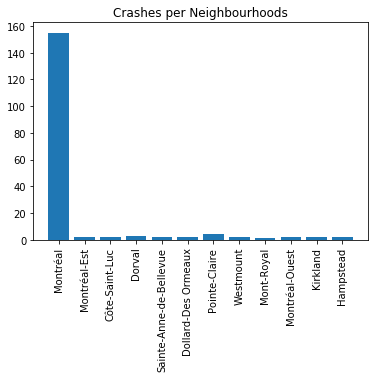

In [34]:
plt.bar(final_montreal["Neighbourhoods"], final_montreal["Number of Collisions"])
plt.title('Crashes per Neighbourhoods')
plt.xticks(rotation="vertical")
plt.savefig('Output/hoods-bar.png')

In [20]:
income_analysis= final_montreal_data.groupby("Hour").count()
income_analysis=income_analysis.drop(99.0, axis=0)
income_analysis=income_analysis.reset_index()

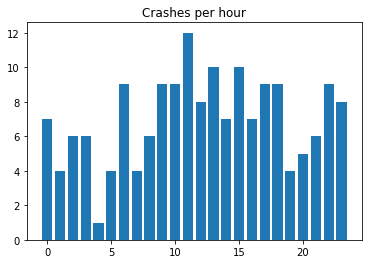

In [21]:
plt.bar(income_analysis['Hour'],income_analysis['Year'])
plt.title('Crashes per hour')
plt.savefig('Output/districts_hist.png')

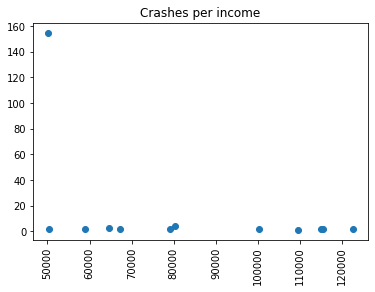

In [32]:
plt.scatter(final_montreal['Median Income'],final_montreal['Number of Collisions'])
plt.xticks(rotation="vertical")
plt.title('Crashes per income')
plt.savefig('Output/crashesperincome.png')

In [30]:
gmaps.configure(api_key=g_key)

In [31]:
locations = final_montreal_data[["Latitude", "Longitude"]].astype(float)
fig = gmaps.figure(map_type='HYBRID')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))